# SNIFS R-channel

**Author:** Yannick Copin <y.copin@ipnl.in2p3.fr>

We construct a very simple optical model mimicking the red channel of the Supernova Integral Field Spectrograph.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import mpld3
mpld3.enable_notebook()
import numpy as N
import spectrogrism as S
S.__version__

/data/ycopin/Softs/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/data/ycopin/Softs/local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/data/ycopin/Softs/local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


'0.4'

Load the SNIFS-R channel optical configuration:

In [3]:
optcfg = S.OptConfig(S.SNIFS_R)
print(optcfg)

------------------ Optical configuration 'SNIFS-R' -------------------
  name                : SNIFS-R
  wave_ref            : 7.6e-07
  wave_range          : [5e-07, 1.02e-06]
  telescope_flength   : 22.5
  collimator_flength  : 0.169549
  collimator_distortion: 2.141
  collimator_lcolor_coeffs: [-4.39879e-06, 8.91241e-10, -1.82941e-13]
  grism_on            : True
  grism_prism_material: BK7
  grism_prism_angle   : 0.301592894745
  grism_grating_rho   : 200.0
  grism_dispersion    : 2.86
  grism_grating_material: EPR
  grism_grating_blaze : 0.261799387799
  camera_flength      : 0.228014
  camera_distortion   : -0.276
  camera_lcolor_coeffs: [2.66486e-06, -5.52303e-10, 1.1365e-13]
  detector_pxsize     : 1.5e-05
  detector_angle      : 0.0


Load the simulation configuration:

In [4]:
simcfg = S.SimConfig(S.SNIFS_SIMU)
print(simcfg)

---------------- Simulation configuration u'standard' ----------------
  name                : standard
  wave_npx            : 10
  orders              : [-1, 0, 1, 2]
  input_coords        : [-0.01  -0.005  0.     0.005  0.01 ]
  input_angle         : -0.174532925199


Create a `Spectrograph` instance from optical configuration:

In [5]:
spectro = S.Spectrograph(optcfg, grism_on=optcfg.get('grism_on', True))
print(spectro)

----------------------- Spectrograph -----------------------
Collimator: f=0.2 m, e=+2.141
  Lateral color: lref=0.76 µm, coeffs=-4.39879e-06, +8.91241e-10, -1.82941e-13
Grism:
  Prism [BK7]: A=17.28°, tilts=+0',+0',+0'
  Grating [EPR]: rho=200.0 g/mm, blaze=15.00°
  1st-order null-deviation wavelength: 0.76 µm
Camera: f=0.2 m, e=-0.276
  Lateral color: lref=0.76 µm, coeffs=+2.66486e-06, -5.52303e-10, +1.1365e-13
Detector: pxsize=15 µm
  offset=(+0.000, +0.000) mm, angle=0.0 deg
Spectrograph magnification: 1.345
Central dispersion: 2.77 AA/px at 0.76 µm


Test the optical model:

In [6]:
try:
    spectro.test(simcfg, verbose=False)
except AssertionError as err:
    print "ERROR: ", err
else:
    print " SUCCESSFUL ROUND-TRIP TEST ".center(70, '-')

--------------------- SUCCESSFUL ROUND-TRIP TEST ---------------------


Simulate spectra on the detector and plot:

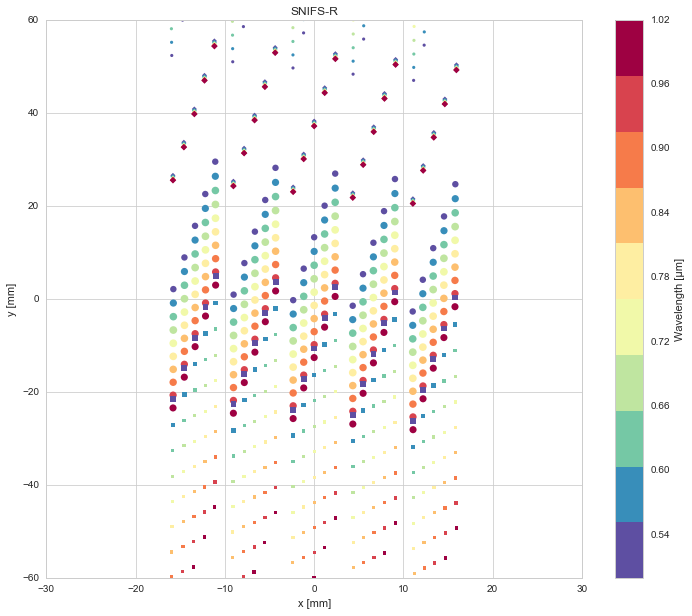

In [7]:
detector = spectro.model(simcfg)
ax = detector.plot(orders=(-1, 0, 1, 2), blaze=True)
ax.set_aspect('auto')
ax.axis(N.array([-2000, 2000, -4000, 4000]) *
        spectro.detector.pxsize / 1e-3)  # [mm]
ax.figure.set_size_inches(12, 10)

This sequence of actions is readily available under `S.plot_SNIFS()` function.